# Dataset splitting

In [1]:
# Import the data splitting method from sklearn
from sklearn.model_selection import train_test_split
# Import datasets from sklearn:
from sklearn import datasets
# Import Numpy for computations
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Put the data into variable X, and target into variable Y
X = diabetes.data
Y = diabetes.target

In [2]:
# Typically, the rows (first dimension) indicate the samples (eg subject).
# The columns (second dimension) indicate the features (measurements).
# The diabetes dataset has 442 subjects.
# Every subject has 10 features.
# The sklearn datasets have the fature_names parameter.
## Print the feature_names parameter from the diabetes dataset.
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
# Split the data into training/testing sets
# Put 0.7 of the data in the training set
## Use train_test_split( ??? )
## print the shapes of each
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=0.7, test_size=0.3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(442, 10)
(309, 10)
(133, 10)
(309,)
(133,)


In [4]:
# Visualize the data using the pyplot module from matplotlib:
from matplotlib import pyplot as plt
# Plt the target vs. the second dimension
# Use plt.scatter( ???, ??? )
# Add x- and y-labels using plt.xlabel('x') and plt.ylabel('y')
plt.figure()
plt.scatter( X_train[:, 2], Y_train)
plt.xlabel('BMI')
plt.ylabel('Diabetes progression')

Text(0,0.5,'Diabetes progression')

# Linear regression

In [5]:
# import datasets
from sklearn import datasets
# Import linear regressor class:
from sklearn.linear_model import LinearRegression
# Import MSE metric
from sklearn.metrics import mean_squared_error

## Create a regressor object using the LinearRegression class:
lin_reg = LinearRegression()

In [6]:
# Perform linear regression
# sklearn models all have the .fit() methodtPCA
# To use it: model.fit()
lin_reg.fit( X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Coefficient value')

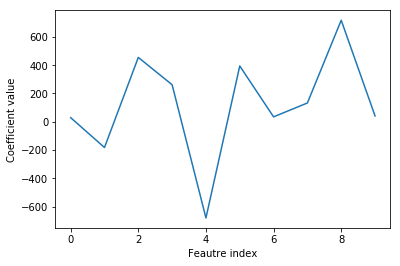

In [7]:
# Plot the coefficients using plt.plot( ??? )
plt.figure()
plt.plot(lin_reg.coef_)
plt.xlabel('Feautre index')
plt.ylabel('Coefficient value')

In [8]:
# To evaluate a model, we need Error( Y_target, Y_pred)
# Look at both the training and test error.
# Get predictions for using the .predict( ???) method
prediction_train = lin_reg.predict(X_train)
prediction_test = lin_reg.predict(X_test)

In [9]:
# Get the MSE using mean_squared_error, which we imported earlier
mse_train = mean_squared_error(Y_train, prediction_train)
mse_test = mean_squared_error(Y_test, prediction_test)

print(mse_train)
print(mse_test)

2973.898331431786
2705.4883638046203


In [10]:
## Try different data splits using train_test_split(X, Y, train_size=0.2)
## What happens to the MSE when you have more training data (0.8) ?
## What happens when you have less (0.2) ?

# Cross-validation

In [11]:
# We can do K-fold cross-validation using the Kfold class
from sklearn.model_selection import KFold

# Initialize the class with the number of folds:
kf_splitter = KFold(n_splits=5)

# The .split method of kf_splitter returns a generator.
# In Python, we can iterate over generators in a loop like a list
# Loop with list:
for i in [-4,-3,-2,-1]:
    print(i)
# Loop with generator:
for i in range(5):
    print(i)


-4
-3
-2
-1
0
1
2
3
4


[2845.0055068733723, 2928.3379346655547, 3037.01129256615, 3070.4634857040514, 2863.7378939601945]
[3570.054075140494, 3207.7142014478013, 2857.7914487698313, 2834.29143659152, 3576.4543482731483]


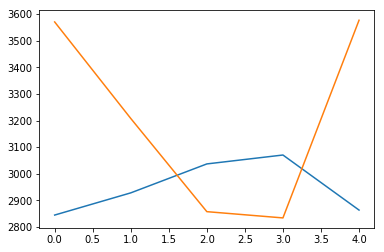

In [12]:
# The .split() method returns indices to the dataset
kf_splitter = KFold(n_splits=5)
## In each loop, train our regressor and save the MSE

mse_train = []
mse_valid = []
## NOTE: We can use cross_val_score instead of this loop
## The code here is used as a demonstration
for train_index, valid_index in kf_splitter.split(X_train):
    # Get our training data in this fold
    kX_train = X_train[train_index, :]
    kY_train = Y_train[train_index]
    
    # Get our validation data in this fold
    kX_valid = X_train[valid_index, :]
    kY_valid = Y_train[valid_index]

    # Train our regressor
    lin_reg.fit( kX_train, kY_train)
    
    # Get our prediction for training, validation:
    prediction_train = lin_reg.predict( kX_train)
    prediction_valid = lin_reg.predict( kX_valid)
    
    kmse_train = mean_squared_error( kY_train, prediction_train)
    mse_train.append(kmse_train)
    
    kmse_valid = mean_squared_error( kY_valid, prediction_valid )
    mse_valid.append(kmse_valid)

# Print the mse
print(mse_train)
print(mse_valid)

plt.figure()
plt.plot(mse_train)
plt.plot(mse_valid)

Use array indexing to reduce the data that is put into the .split() method.
kf_splitter.split( X[ ???, ???] )
What happens when we increase the number of folds (n_splits=??)

# Support Vector Machines

In [13]:
# Import the Support Vector Machine classifier:
from sklearn import svm
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix

svm_classifer = svm.SVC()

# Load the wine data
wine = datasets.load_wine()

# Extract the wine data/target
X = wine.data
Y = wine.target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=0.7)
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(178, 13)
(124, 13)
(54, 13)


/Users/TiffanyWang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


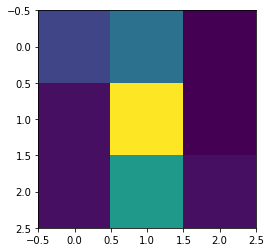

In [14]:
# Train the SVM classifier:
svm_classifer.fit(X_train, Y_train)

# Get the predictions of the classifier:
prediction = svm_classifer.predict( X_test )

# Create the confusion matrix using the function:
conf = confusion_matrix(Y_test, prediction)

# We can plot images using pyplot.imshow( ???)
plt.figure()
plt.imshow(conf)

What happened? Why is the classifier unable to classify the data?  

SVMs use kernels on the input space. Kernels transform the features.
Not all transformations are useful, and can destroy useful info.

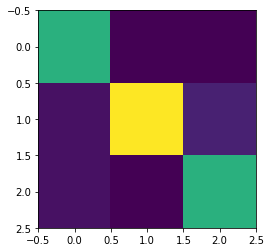

In [15]:
# We can change the kernel using the "kernel" parameter
# Different kernels are described in the documentation
# Use kernel='poly' for now
svm_classifer = svm.SVC(kernel='poly')
# Fit, predict, and plot the confusion matrix
svm_classifer.fit(X_train, Y_train)
prediction = svm_classifer.predict( X_test)
conf = confusion_matrix( Y_test, prediction)

plt.figure()
plt.imshow(conf)

NOTE: SVMs are binary classifiers; they separate two labels only.
One-vs-one (OVO) classification, which learns one discriminator for every pair of labels. (creates ~N^2 classifiers)
One-vs-all (OVA) classification, which learns to discriminate each label from all other labels (creates N classifiers)

# Principal Component Analysis

In [2]:
# Import PCA from sklearn:
from sklearn.decomposition import PCA

# Load the iris dataset:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Split the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=0.7)

# Initialize PCA object; use "n_components" to see number of PC
pca = PCA(n_components=3)

# Fit the PCA and return the data using pca.fit_transform( ... )
X_train_pca = pca.fit_transform( X_train )

# Using the object, transform the test set
X_test_pca = pca.transform(X_test)

# Print the shape of the transformed data
print(X_train_pca.shape)

# Get the variance explained by every principal component:
print(pca.explained_variance_ratio_)

(105, 3)
[0.92306146 0.055133   0.01719384]


/Users/TiffanyWang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(X_train[0].shape)
print(X_train[0])

(150, 4)
(105, 4)
(45, 4)
(4,)
[6.4 2.8 5.6 2.2]


In [20]:
# Let's visualize our data using a scatterplot
# Logical indexing can be a powerful tool for selecting data
# We can select the data from X_train which matches a class:

X_class_0 = X_train_pca[ Y_train == 0, :]
X_class_1 = X_train_pca[ Y_train == 1, :]
X_class_2 = X_train_pca[ Y_train == 2, :]
print(X_class_0.shape)

(33, 2)


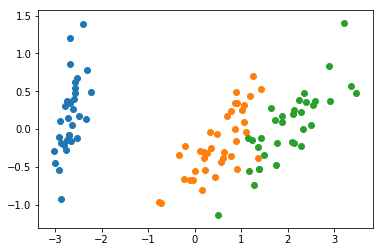

In [21]:
# Create a scatter plot
# Use different colors for the different classes!

plt.figure()
plt.scatter(X_class_0[:,0], X_class_0[:,1])
plt.scatter(X_class_1[:,0], X_class_1[:,1])
plt.scatter(X_class_2[:,0], X_class_2[:,1])

In [22]:
# How does this affect classification?
# Does PCA help classify the data?
# Let's classify the data using a logistic regressor
# Import the logistic regressor:
from sklearn.linear_model import LogisticRegression
# We will need a classification error (log_loss)
from sklearn.metrics import log_loss

# Initialize the object:
log_reg = LogisticRegression()

# Fit the non-PCA data using the log regressor
log_reg.fit( X_train, Y_train)
# Get the classification error - we need to get the probability
# log_reg.predict_proba( ??? )
prediction = log_reg.predict_proba( X_test )
print(log_loss(Y_test, prediction))

# Fit the PCA data
log_reg.fit( X_train_pca, Y_train)

# Get the classification error
prediction = log_reg.predict_proba( X_test_pca )
print('PCA:')
print(log_loss(Y_test, prediction))

0.33017315391703245
PCA:
0.35799671761283697


# K-means

In [23]:
# We'll use the .make_blobs function from datasets to create data
num_cluster_data = 5
# Use three keyword arguments: 
## n_samples=1000, cluster_std=2, centers=5
# The function returns [data, cluster_index]
X, Y = datasets.make_blobs( n_samples=1000, cluster_std=2, centers=5)
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

C:\Users\Lex-Lab\Anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


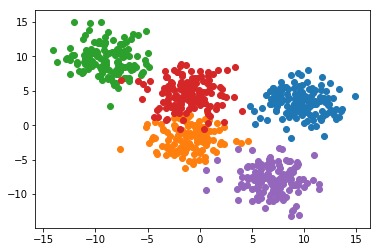

In [25]:
# Plot the training data using different colors for the clusters
# Use logical indexing to select data
plt.figure()
for i in range(num_cluster_data):
    blob = X_train[ Y_train==i, :]
    plt.scatter( blob[:, 0], blob[:, 1] )

In [26]:
# Import KMeans and initialize the object
from sklearn.cluster import KMeans
num_clusters=5
km = KMeans(n_clusters=num_clusters)

In [27]:
# Fit the km object and predict on the test data
km.fit( X_train)
km_predict = km.predict( X_test)

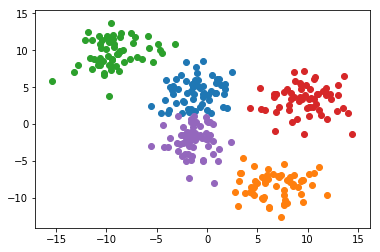

In [28]:
# Plot the groups as before
plt.figure()
for i in range(num_clusters):
    blob = X_test[ km_predict==i, :]
    plt.scatter( blob[:, 0], blob[:,1])

Vary the parameters for the data and re-run the code.
What happens when you have a high std?
What happens when the number of generated clusters isn't the same as you're fitting?